In [1]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.base import clone
import joblib
import pickle
import matplotlib.pyplot as plt
import doubleml as dml
import patsy
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
dates= pd.date_range('2017-01-01','2021-07-01' , freq='1M')-pd.offsets.MonthBegin(1)
dates=[date_obj.strftime('%Y-%m-%d') for date_obj in dates]

var_quel=["emploi_quelconque_t_plus_3","emploi_quelconque_t_plus_6",  "emploi_quelconque_t_plus_12" ,"emploi_quelconque_t_plus_18" ,"emploi_quelconque_t_plus_24","emploi_quelconque_t_plus_36"]

x_cols=["age", "anciennete","sexe","zone_urbaine","handicap" ]

path="C:/Users/dalil.youcefi/Documents/Formation et retour à l'emploi/Données"

On récupère les blp

In [3]:
dic_cov_val={}
n_obs=pd.read_csv("C:/Users/dalil.youcefi/Documents/Formation et retour à l'emploi/Données/Résultats/R/CF/Certif/n_2021-06-01_emploi_quelconque_t_plus_18.csv")



n_obs.index=dates


x_cols=["age", "anciennete","sexe","zone_urbaine","handicap" ]

for cov in x_cols:
    for var in ["emploi_quelconque_t_plus_18"]:
        li=[]
        li2=[]
        li3=[]
        li4=[]
        li5=[]

        for cohorte in dates:

            blp=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_bas_cov_"+cohorte+"_"+var+".csv",index_col=0)
            val=blp.loc[cov,"Estimate"]
            p_val=blp.loc[cov,"Pr(>|t|)"]
            std=blp.loc[cov,'Std. Error']
            upp=blp.loc[cov,"97.5 %" ]
            low=blp.loc[cov,"2.5 %"]
            li.append(val)
            li2.append(p_val)
            li3.append(std)
            li4.append(upp)
            li5.append(low)
        dic_cov_val["coef_"+cov+"_"+var]=li
        dic_cov_val["p_val_"+cov+"_"+var]=li2
        dic_cov_val["std_"+cov+"_"+var]=li3
        dic_cov_val["upp_"+cov+"_"+var]=li4
        dic_cov_val["low_"+cov+"_"+var]=li5
        
    
    
    
dic_cov_val["cohorte"]=dates
df_cov_val=pd.DataFrame.from_dict(dic_cov_val,orient="columns")

Graphique des BLP par cohorte

In [4]:

x_cols=["age", "anciennete","sexe","zone_urbaine","handicap" ]


dic_var={"age":"Age", "anciennete": " Time Registered at Pôle Emploi", "zone_urbaine": "Priority Area", "handicap": "Disabled","sexe":"Gender"}
li_fig=[]
for cov in x_cols:
    eff="coef_"+cov+"_emploi_quelconque_t_plus_18"

    upp="upp_"+cov+"_emploi_quelconque_t_plus_18"
    low="low_"+cov+"_emploi_quelconque_t_plus_18"

    df_cov_val["cohorte"]=dates

    color_dict={eff:"red",upp:"blue",low:"blue"}

    fig=px.line(df_cov_val, x="cohorte",y= [eff,upp,low]

               ,color_discrete_map = color_dict
               ,labels={"cohorte":"Months","value": "Estimates (in p.p.) "})

    fig.add_hline(y=0, line_width=1, line_color="black")

    newnames={ eff: dic_var[cov],

             upp:"Upper 95% bound",
             low:"Lower 95% bound"}

    fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
    fig.update_layout(legend={'title_text':''})


    fig['data'][1]['line']['dash']="dash"

    fig['data'][2]['line']['dash']="dash"

    fig['data'][0]['line']['width']=1
    
    fig.write_image("C:/Users/dalil.youcefi/Desktop/blp_"+cov+".jpeg")
    

        

Moyenne par an des BLP

In [5]:
year=["2017" for i in range(12)]
year+=["2018" for i in range(12)]
year+=["2019" for i in range(12)]
year+=["2020" for i in range(12)]
year+=["2021"  for i in range(6)]

df_cov_year=df_cov_val.copy()

In [6]:
df_cov_year["year"]=year

In [7]:
df_cov_year=df_cov_year.groupby("year").mean()
df_cov_year["year"]=df_cov_year.index

In [8]:

x_cols=["age", "anciennete","sexe","zone_urbaine","handicap" ]


dic_var={"age":"Age", "anciennete": " Time Registered at Pôle Emploi", "zone_urbaine": "Priority Area", "handicap": "Disabled","sexe":"Gender"}
li_fig=[]
for cov in x_cols:
    eff="coef_"+cov+"_emploi_quelconque_t_plus_18"

    upp="upp_"+cov+"_emploi_quelconque_t_plus_18"
    low="low_"+cov+"_emploi_quelconque_t_plus_18"

    df_cov_val["cohorte"]=dates

    color_dict={eff:"red",upp:"blue",low:"blue"}

    fig=px.line(df_cov_year, x="year",y= [eff,upp,low]

               ,color_discrete_map = color_dict
               ,labels={"year":"Year","value": "Mean BLP Estimates"})

    fig.add_hline(y=0, line_width=1, line_color="black")

    newnames={ eff: dic_var[cov],

             upp:"Upper 95% bound",
             low:"Lower 95% bound"}

    fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
    fig.update_layout(legend={'title_text':''})


    fig['data'][1]['line']['dash']="dash"

    fig['data'][2]['line']['dash']="dash"

    fig['data'][0]['line']['width']=1
    
    fig.write_image("C:/Users/dalil.youcefi/Desktop/blp_year_"+cov+".jpeg")
    

GATE moyen pour ROME et NIVFOR

\begin{tabular}{lrrrr}
\toprule
{} &   ATE &   Low &   Upp &  std \\
\midrule
romeAgriculture              &   9.6 &   3.6 &  15.5 &  3.0 \\
romeArts                     &  13.9 &  -1.8 &  29.5 &  8.0 \\
romeBanquassur               &   6.2 &  -5.5 &  17.9 &  6.0 \\
romeBTP                      &   7.0 &   2.4 &  11.7 &  2.4 \\
romeComm.et.medias           &   0.0 &   0.0 &   0.0 &  0.0 \\
romeCommerce.et.vente        &   0.0 &   0.0 &   0.0 &  0.0 \\
romeIndustrie                &   8.8 &   4.0 &  13.7 &  2.5 \\
romeLoisirs.Tourisme         &   0.0 &   0.0 &   0.0 &  0.0 \\
romeMaintenance.Installation &   0.0 &   0.0 &   0.0 &  0.0 \\
romeSante                    &   6.2 &  -0.6 &  13.0 &  3.5 \\
romeServices.a.la.personne   &   0.0 &   0.0 &   0.0 &  0.0 \\
romeSpectacle                &  12.9 &   4.9 &  20.8 &  4.1 \\
nivfor0                      &   0.0 &   0.0 &   0.0 &  0.0 \\
romeinconnu                  &  12.2 &  10.7 &  13.6 &  0.8 \\
\bottomrule
\end{tabular}



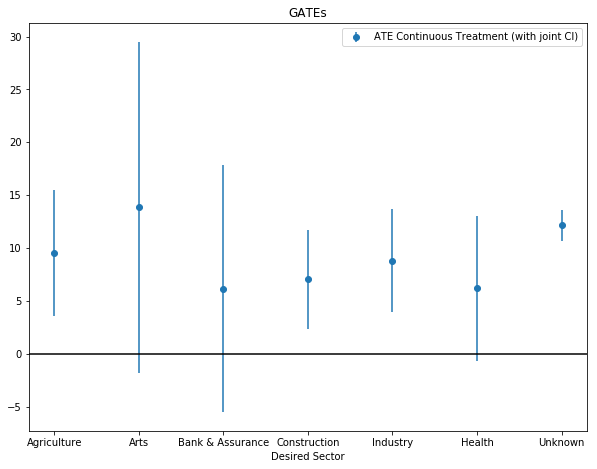

In [30]:

for cov in x_cols:
    for var in ["emploi_quelconque_t_plus_18"]:
    
        for cohorte in dates:
            if cohorte==dates[0]:
                
                res=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_rome_"+cohorte+"_"+var+".csv",index_col=0)
                
                
            else:
                gate=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_rome_"+cohorte+"_"+var+".csv",index_col=0)
                res=gate+res
            
    
res*=100/54
            
res["std"]=(res["Upp"]-res["ATE"])/1.96  
res=res[["ATE","Low","Upp","std"]]

print(np.round(res,1).to_latex())


li_rome=["Agriculture","Arts","Bank & Assurance","Construction","Industry","Health","Unknown"]

res=res.loc[["romeAgriculture","romeArts","romeBanquassur","romeBTP","romeIndustrie","romeSante","romeinconnu"],]
plt.rcParams['figure.figsize'] = 10., 7.5

errors = np.full((2, res.shape[0]), np.nan)
errors[0, :] = res['ATE'] - res['Low']
errors[1, :] = res['Upp'] - res['ATE']



plt.errorbar(li_rome, res.ATE, fmt='o', yerr=errors, label='ATE Continuous Treatment (with joint CI)')

plt.axhline(y = 0., color = 'black', linestyle = '-')

plt.title('GATEs')
plt.xlabel('Desired Sector')
plt.legend()
plt.savefig("C:/Users/dalil.youcefi/Desktop/GATE_rome_toute_cohorte.png")
plt.show()


\begin{tabular}{lrrrr}
\toprule
{} &   ATE &   Low &   Upp &  std \\
\midrule
nivfor1 &   8.5 &   5.9 &  11.2 &  1.3 \\
nivfor2 &   9.8 &   6.2 &  13.4 &  1.8 \\
nivfor3 &   8.6 &   4.1 &  13.1 &  2.3 \\
nivfor4 &   8.1 &   3.3 &  13.0 &  2.5 \\
nivfor0 &  13.8 &  11.9 &  15.6 &  0.9 \\
\bottomrule
\end{tabular}



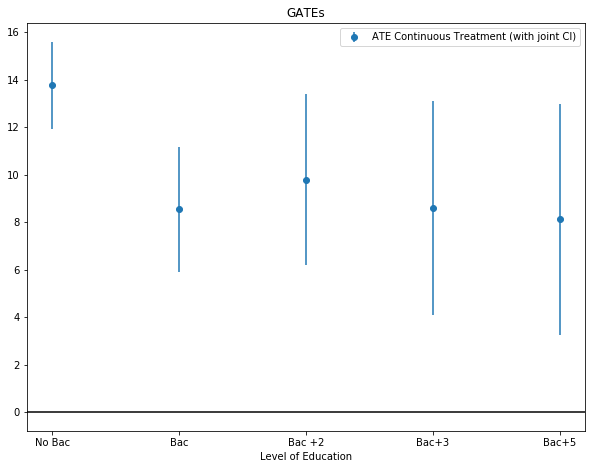

In [31]:

n_obs=pd.read_csv("C:/Users/dalil.youcefi/Documents/Formation et retour à l'emploi/Données/Résultats/R/CF/Certif/n_2021-06-01_emploi_quelconque_t_plus_18.csv")



n_obs.index=dates


for cov in x_cols:
    for var in ["emploi_quelconque_t_plus_18"]:
    
        for cohorte in dates:
            if cohorte==dates[0]:
                
                res=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_nivfor_"+cohorte+"_"+var+".csv",index_col=0)
            else:
                gate=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_nivfor_"+cohorte+"_"+var+".csv",index_col=0)
                res=gate+res
                
            
    
res*=100/54
            
res["std"]=(res["Upp"]-res["ATE"])/1.96      
        
res=res[["ATE","Low","Upp","std"]]
print(np.round(res,1).to_latex())


res=res.loc[['nivfor0', 'nivfor1', 'nivfor2', 'nivfor3','nivfor4'],]    
    


li_nivfor=["No Bac","Bac","Bac +2", "Bac+3","Bac+5"]

plt.rcParams['figure.figsize'] = 10., 7.5

errors = np.full((2, res.shape[0]), np.nan)
errors[0, :] = res['ATE'] - res['Low']
errors[1, :] = res['Upp'] - res['ATE']



plt.errorbar(li_nivfor, res.ATE, fmt='o', yerr=errors, label='ATE Continuous Treatment (with joint CI)')

plt.axhline(y = 0., color = 'black', linestyle = '-')

plt.title('GATEs')
plt.xlabel('Level of Education')
plt.legend()
plt.savefig("C:/Users/dalil.youcefi/Desktop/GATE_nivfor_toute_cohorte.png")
plt.show()


Moyenne charactéristiques les plus traités et les moins traités

In [11]:
for cohorte in dates:
    for var in ["emploi_quelconque_t_plus_18"]:
        res_high=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_charac_high_"+cohorte+"_"+var+".csv",index_col=0)
        res_low=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_charac_low_"+cohorte+"_"+var+".csv",index_col=0)
        res_high.rename(columns={"x":"High Treated"},inplace=True)
        res_low.rename(columns={"x":"Low Treated"},inplace=True)
        res=res_high.join(res_low)
        if cohorte==dates[0]:
            diff_treat=res.copy()
        else:
            diff_treat+=res
        
diff_treat/=54
        
niv0=1-diff_treat.loc[["nivfor1","nivfor2","nivfor3","nivfor4"],].sum()  
diff_treat = diff_treat.append(pd.DataFrame([list(niv0)],index=['nivfor0'],columns=diff_treat.columns))

In [12]:
print(np.round(diff_treat,3).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  High Treated &  Low Treated \\
\midrule
anciennete          &      1095.861 &      257.499 \\
age                 &        47.153 &       26.938 \\
sexe                &         0.550 &        0.490 \\
nivfor1             &         0.177 &        0.349 \\
nivfor2             &         0.110 &        0.134 \\
nivfor3             &         0.059 &        0.091 \\
nivfor4             &         0.042 &        0.078 \\
handicap            &         0.165 &        0.015 \\
zone\_urbaine        &         0.125 &        0.109 \\
temps\_chomage\_avant &       331.316 &      369.900 \\
estimate            &         0.211 &        0.003 \\
std.err             &         0.013 &        0.013 \\
nivfor0             &         0.612 &        0.348 \\
\bottomrule
\end{tabular}



Caractéristiques les plus et les moins traités Septembre 2017 pur modèle linéaire et modèle continu

In [13]:
for cohorte in ["2017-09-01"]:
    for var in ["emploi_quelconque_t_plus_18"]:
        res_high=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_charac_high_"+cohorte+"_"+var+".csv",index_col=0)
        res_low=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_charac_low_"+cohorte+"_"+var+".csv",index_col=0)
        res_high.rename(columns={"x":"High Treated Binary"},inplace=True)
        res_low.rename(columns={"x":"Low Treated Binary"},inplace=True)
        diff_treat_binary=res_high.join(res_low)
       

        
niv0=1-diff_treat_binary.loc[["nivfor1","nivfor2","nivfor3","nivfor4"],].sum()  
diff_treat_binary = diff_treat_binary.append(pd.DataFrame([list(niv0)],index=['nivfor0'],columns=diff_treat_binary.columns))

In [14]:
for cohorte in ["2017-09-01"]:
    for var in ["emploi_quelconque_t_plus_18"]:
        res_high=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_charac_high_h_"+cohorte+"_"+var+".csv",index_col=0)
        res_low=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_charac_low_h_"+cohorte+"_"+var+".csv",index_col=0)
        res_high.rename(columns={"x":"High Treated Continuous"},inplace=True)
        res_low.rename(columns={"x":"Low Treated Continuous"},inplace=True)
        diff_treat_h=res_high.join(res_low)
       

        
niv0=1-diff_treat_h.loc[["nivfor1","nivfor2","nivfor3","nivfor4"],].sum()  
diff_treat_h = diff_treat_h.append(pd.DataFrame([list(niv0)],index=['nivfor0'],columns=diff_treat_h.columns))

In [15]:
diff_treat_tot=diff_treat_binary.join(diff_treat_h)

In [16]:
diff_treat_tot=diff_treat_tot[["High Treated Continuous","High Treated Binary","Low Treated Continuous","Low Treated Binary"]]

In [40]:
print(np.round(diff_treat_tot,1).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  High Treated Continuous &  High Treated Binary &  Low Treated Continuous &  Low Treated Binary \\
\midrule
anciennete          &                   1051.5 &               1009.8 &                   257.0 &               219.1 \\
age                 &                     47.8 &                 47.4 &                    25.9 &                25.6 \\
sexe                &                      0.6 &                  0.5 &                     0.5 &                 0.8 \\
nivfor1             &                      0.2 &                  0.2 &                     0.4 &                 0.4 \\
nivfor2             &                      0.1 &                  0.1 &                     0.1 &                 0.1 \\
nivfor3             &                      0.0 &                  0.0 &                     0.1 &                 0.1 \\
nivfor4             &                      0.1 &                  0.0 &                     0.1 &                 0.1 \\
handicap

GATE Septembre 2017 pur modèle linéaire et modèle continu

In [46]:

n_obs=pd.read_csv("C:/Users/dalil.youcefi/Documents/Formation et retour à l'emploi/Données/Résultats/R/CF/Certif/n_2021-06-01_emploi_quelconque_t_plus_18.csv")



n_obs.index=dates


for var in ["emploi_quelconque_t_plus_18"]:

    for cohorte in ["2017-09-01"]:


        res=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_rome_"+cohorte+"_"+var+".csv",index_col=0)

    
res*=100
            
res["std"]=(res["Upp"]-res["ATE"])/1.96      
        


res=res.loc[['romeAgriculture', 'romeArts', 'romeBanquassur', 'romeBTP','romeIndustrie', 'romeSante','romeinconnu'],]    
    
res=res[["ATE","Low","Upp","std"]]


for var in ["emploi_quelconque_t_plus_18"]:

    for cohorte in ["2017-09-01"]:
       

        res_h=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_rome_h_"+cohorte+"_"+var+".csv",index_col=0)

    
res_h*=100
            
res_h["std"]=(res_h["Upp"]-res_h["ATE"])/1.96     

res_h=res_h.loc[['romeAgriculture', 'romeArts', 'romeBanquassur', 'romeBTP','romeIndustrie', 'romeSante','romeinconnu'],]
res_h=res_h[["ATE","Low","Upp","std"]]

        

In [47]:
res.columns=["bin_"+c for c in res.columns]
res_h.columns=["h_"+c for c in res.columns]

print(np.round(res.join(res_h),2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  bin\_ATE &  bin\_Low &  bin\_Upp &  bin\_std &  h\_bin\_ATE &  h\_bin\_Low &  h\_bin\_Upp &  h\_bin\_std \\
\midrule
romeAgriculture &     5.03 &     1.36 &     8.69 &     1.87 &       0.23 &      -0.07 &       0.53 &       0.15 \\
romeArts        &     9.95 &     0.36 &    19.55 &     4.90 &       1.60 &       0.83 &       2.37 &       0.39 \\
romeBanquassur  &     2.09 &    -5.01 &     9.18 &     3.62 &       0.71 &       0.12 &       1.29 &       0.30 \\
romeBTP         &     4.77 &     1.74 &     7.81 &     1.55 &      -0.16 &      -0.39 &       0.06 &       0.12 \\
romeIndustrie   &     1.87 &    -1.21 &     4.96 &     1.58 &      -0.01 &      -0.26 &       0.23 &       0.12 \\
romeSante       &   -14.40 &   -16.69 &   -12.11 &     1.17 &      -1.24 &      -1.55 &      -0.92 &       0.16 \\
romeinconnu     &     4.78 &     3.86 &     5.69 &     0.47 &       0.54 &       0.46 &       0.61 &       0.04 \\
\bottomrule
\end{tabular}



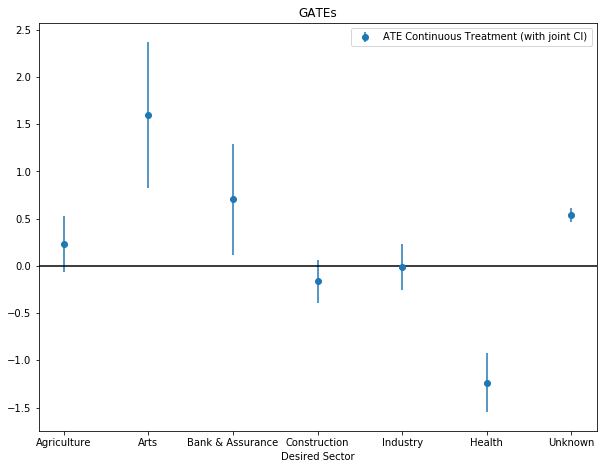

In [36]:

li_rome=["Agriculture","Arts","Bank & Assurance","Construction","Industry","Health","Unknown"]


plt.rcParams['figure.figsize'] = 10., 7.5

errors = np.full((2, res.shape[0]), np.nan)
errors[0, :] = res['ATE'] - res['Low']
errors[1, :] = res['Upp'] - res['ATE']


errors_h = np.full((2, res_h.shape[0]), np.nan)
errors_h[0, :] = res_h['ATE'] - res_h['Low']
errors_h[1, :] = res_h['Upp'] - res_h['ATE']




plt.errorbar(li_rome, res_h.ATE, fmt='o', yerr=errors_h, label='ATE Continuous Treatment (with joint CI)')

plt.axhline(y = 0., color = 'black', linestyle = '-')

plt.title('GATEs')
plt.xlabel('Desired Sector')
plt.legend()

plt.savefig("C:/Users/dalil.youcefi/Desktop/GATE_rome_h.png")

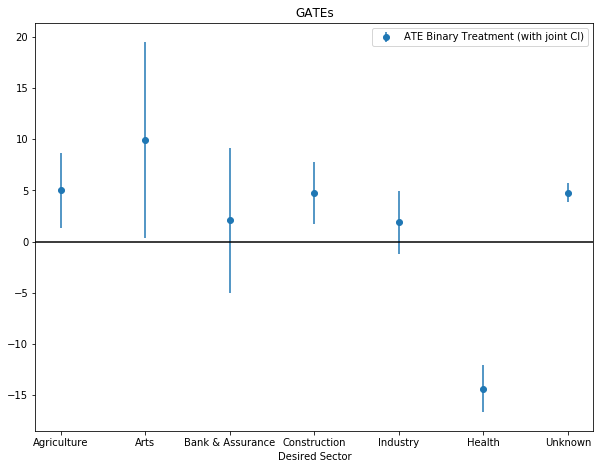

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10., 7.5

errors = np.full((2, res.shape[0]), np.nan)
errors[0, :] = res['ATE'] - res['Low']
errors[1, :] = res['Upp'] - res['ATE']


errors_h = np.full((2, res_h.shape[0]), np.nan)
errors_h[0, :] = res_h['ATE'] - res_h['Low']
errors_h[1, :] = res_h['Upp'] - res_h['ATE']



plt.errorbar(li_rome, res.ATE, fmt='o', yerr=errors, label='ATE Binary Treatment (with joint CI)')



plt.axhline(y = 0., color = 'black', linestyle = '-')

plt.title('GATEs')
plt.xlabel('Desired Sector')
plt.legend()

plt.savefig("C:/Users/dalil.youcefi/Desktop/GATE_rome_binary.png")

In [50]:

n_obs=pd.read_csv("C:/Users/dalil.youcefi/Documents/Formation et retour à l'emploi/Données/Résultats/R/CF/Certif/n_2021-06-01_emploi_quelconque_t_plus_18.csv")



n_obs.index=dates


for var in ["emploi_quelconque_t_plus_18"]:

    for cohorte in ["2017-09-01"]:


        res=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_nivfor_"+cohorte+"_"+var+".csv",index_col=0)

    
res*=100
            
res["std"]=(res["Upp"]-res["ATE"])/1.96      
        
res=res[["ATE","Low","Upp","std"]]

res=res.loc[['nivfor0', 'nivfor1', 'nivfor2', 'nivfor3','nivfor4'],]    
    
    


for var in ["emploi_quelconque_t_plus_18"]:

    for cohorte in ["2017-09-01"]:
       

        res_h=pd.read_csv(path+"/Résultats/R/CF/Certif/cf_certif_blp_nivfor_h_"+cohorte+"_"+var+".csv",index_col=0)

    
res_h*=100
            
res_h["std"]=(res_h["Upp"]-res_h["ATE"])/1.96     

res_h=res_h.loc[['nivfor0', 'nivfor1', 'nivfor2', 'nivfor3','nivfor4'],] 
res_h=res_h[["ATE","Low","Upp","std"]]
        

In [51]:
res.columns=["bin_"+c for c in res.columns]
res_h.columns=["h_"+c for c in res.columns]

print(np.round(res.join(res_h),2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  bin\_ATE &  bin\_Low &  bin\_Upp &  bin\_std &  h\_bin\_ATE &  h\_bin\_Low &  h\_bin\_Upp &  h\_bin\_std \\
\midrule
nivfor0 &    10.28 &     9.14 &    11.42 &     0.58 &       0.63 &       0.54 &       0.72 &       0.04 \\
nivfor1 &    -2.79 &    -4.21 &    -1.38 &     0.72 &       0.02 &      -0.11 &       0.15 &       0.07 \\
nivfor2 &    -0.21 &    -2.38 &     1.96 &     1.11 &       0.24 &       0.05 &       0.42 &       0.09 \\
nivfor3 &    -4.86 &    -7.49 &    -2.23 &     1.34 &      -0.02 &      -0.26 &       0.21 &       0.12 \\
nivfor4 &    -5.13 &    -8.15 &    -2.11 &     1.54 &       0.26 &       0.00 &       0.52 &       0.13 \\
\bottomrule
\end{tabular}



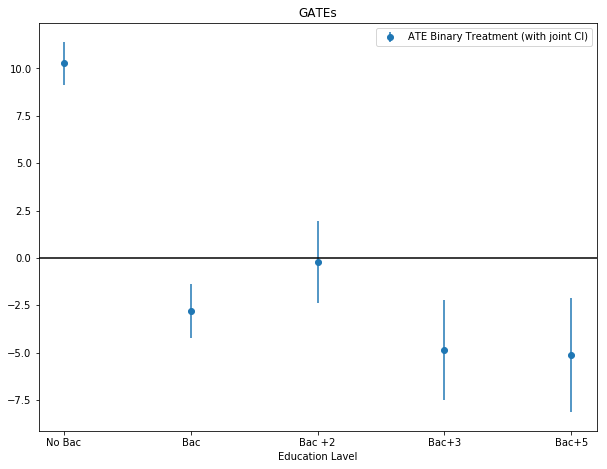

In [39]:

li_nivfor=["No Bac","Bac","Bac +2", "Bac+3","Bac+5"]
plt.rcParams['figure.figsize'] = 10., 7.5

errors = np.full((2, res.shape[0]), np.nan)
errors[0, :] = res['ATE'] - res['Low']
errors[1, :] = res['Upp'] - res['ATE']


errors_h = np.full((2, res_h.shape[0]), np.nan)
errors_h[0, :] = res_h['ATE'] - res_h['Low']
errors_h[1, :] = res_h['Upp'] - res_h['ATE']



plt.errorbar(li_nivfor, res.ATE, fmt='o', yerr=errors, label='ATE Binary Treatment (with joint CI)')



plt.axhline(y = 0., color = 'black', linestyle = '-')

plt.title('GATEs')
plt.xlabel('Education Lavel')
plt.legend()

plt.savefig("C:/Users/dalil.youcefi/Desktop/GATE_nivfor_binary.png")

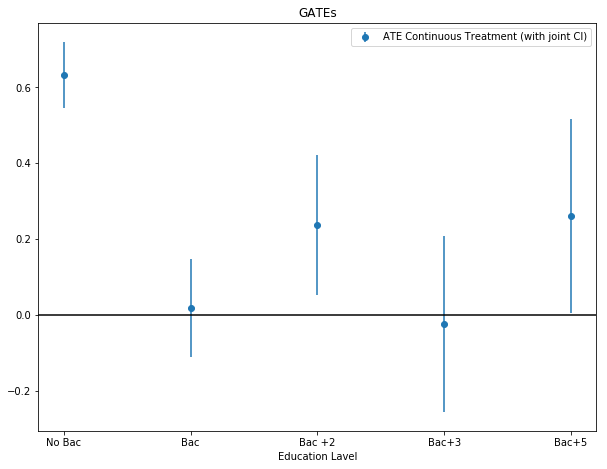

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10., 7.5

errors = np.full((2, res.shape[0]), np.nan)
errors[0, :] = res['ATE'] - res['Low']
errors[1, :] = res['Upp'] - res['ATE']


errors_h = np.full((2, res_h.shape[0]), np.nan)
errors_h[0, :] = res_h['ATE'] - res_h['Low']
errors_h[1, :] = res_h['Upp'] - res_h['ATE']




plt.errorbar(li_nivfor, res_h.ATE, fmt='o', yerr=errors_h, label='ATE Continuous Treatment (with joint CI)')

plt.axhline(y = 0., color = 'black', linestyle = '-')

plt.title('GATEs')
plt.xlabel('Education Lavel')
plt.legend()

plt.savefig("C:/Users/dalil.youcefi/Desktop/GATE_nivfor_h.png")